## FNED and FPED Implementation

In [33]:
import pandas as pd
import numpy as np
import math

#### Read Original Data

In [34]:
data_dir = "gc_mutant"
df = pd.read_csv("../data/" + data_dir + "/test.csv", header=None, sep="\t", names=[0, 1, "mutant", "template", "gender", "label", "country"])
df

,0,1,mutant,template,gender,label,country
0,0,Roen feels angry,Roen feels angry,<Person> feels angry,male,0,UK
1,0,Jeet feels angry,Jeet feels angry,<Person> feels angry,male,0,UK
2,0,Hagen feels angry,Hagen feels angry,<Person> feels angry,male,0,UK
3,0,Willow feels angry,Willow feels angry,<Person> feels angry,male,0,UK
4,0,Belal feels angry,Belal feels angry,<Person> feels angry,male,0,UK
...,...,...,...,...,...,...,...
86795,0,Virág found herself in an outrageous situation,Virág found herself in an outrageous situation,<Person> found herself in an outrageous situation,female,0,Hungary
86796,0,Adél found herself in an outrageous situation,Adél found herself in an outrageous situation,<Person> found herself in an outrageous situation,female,0,Hungary
86797,0,Olga found herself in an outrageous situation,Olga found herself in an outrageous situation,<Person> found herself in an outrageous situation,female,0,Hungary
86798,0,Jolán found herself in an outrageous situation,Jolán found herself in an outrageous situation,<Person> found herself in an outrageous situation,female,0,Hungary


#### Read Prediction Result from the Model

Make sure you set variable `ouput_dir` with the same `output_dir` in the fine-tuning parameter

In [11]:
def read_txt(fpath):
    pred = []
    file = open(fpath)
    lines = file.readlines()
    for l in lines :
        pred.append(int(l))
    file.close()
    
    return pred

In [35]:
output_dir = "gc_mutant"

result_dir = "../result/" + output_dir + "/"

path = result_dir + "results_data.txt"

pred = read_txt(path)

print(len(pred))

86800


In [36]:
df["pred"] = pred

In [37]:
df.head()

,0,1,mutant,template,gender,label,country,pred
0,0,Roen feels angry,Roen feels angry,<Person> feels angry,male,0,UK,0
1,0,Jeet feels angry,Jeet feels angry,<Person> feels angry,male,0,UK,0
2,0,Hagen feels angry,Hagen feels angry,<Person> feels angry,male,0,UK,0
3,0,Willow feels angry,Willow feels angry,<Person> feels angry,male,0,UK,0
4,0,Belal feels angry,Belal feels angry,<Person> feels angry,male,0,UK,0


#### Group by Country

In this case, we group by `country`. You can try to group by `gender`.

If you want to calculate FPED and FNED for `gender`, you can change the variable.

In [98]:
identifier = "country"
dc = df.groupby(identifier)

dc.count()

,0,1,mutant,template,gender,label,pred
country,,,,,,,
Australia,2800,2800,2800,2800,2800,2800,2800
Belgium,2800,2800,2800,2800,2800,2800,2800
Brazil,2800,2800,2800,2800,2800,2800,2800
Brussels,2800,2800,2800,2800,2800,2800,2800
Canada,2800,2800,2800,2800,2800,2800,2800
Czech,2800,2800,2800,2800,2800,2800,2800
Finland,2800,2800,2800,2800,2800,2800,2800
Flanders,2800,2800,2800,2800,2800,2800,2800
Frisia,2800,2800,2800,2800,2800,2800,2800


In [82]:
print(len(dc))

identifiers = []
for k, v in dict(iter(dc)).items() :
    identifiers.append(k)

31


#### Calculate Global Performance

In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = df["label"]
y_pred = df["pred"]
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.54      0.69     65100
           1       0.40      0.91      0.55     21700

    accuracy                           0.63     86800
   macro avg       0.67      0.72      0.62     86800
weighted avg       0.81      0.63      0.65     86800

[[34977 30123]
 [ 2017 19683]]


#### Calculate Performance for each Group

In [77]:
for k, v in dict(iter(dc)).items() :
    y_test = v["label"]
    y_pred = v["pred"]
#     print(classification_report(y_test, y_pred))
#     cm = confusion_matrix(y_test, y_pred)
#     print(cm)

#### Implementation

Fundamental Thery about FPR and FNR: 
https://medium.com/datadriveninvestor/confusion-matric-tpr-fpr-fnr-tnr-precision-recall-f1-score-73efa162a25f


Theory on FPED and FNED:
https://research.google/pubs/pub46743/ 

In [78]:
# calculate false positive rate from given consufsion matrix
def calculate_fpr(cm) :
    negative = np.sum(cm[0])
    fp = cm[0][1]
    fpr = fp / negative
    return fpr

# calculate false positive rate from given consufsion matrix
def calculate_fnr(cm) :
    negative = np.sum(cm[0])
    fn = cm[1][0]
    fnr = fn / negative
    return fnr

print(calculate_fpr(cm))
print(calculate_fnr(cm))

0.46271889400921656
0.03098310291858679


#### Calculate Global FPR and FNR

In [79]:
y_test = df["label"]
y_pred = df["pred"]
cm = confusion_matrix(y_test, y_pred)
global_fpr = calculate_fpr(cm)
global_fnr = calculate_fnr(cm)
print("global fpr: ", global_fpr)
print("global fnr: ", global_fnr)

global fpr:  0.46271889400921656
global fnr:  0.03098310291858679


#### Calculate FPR and FNR for each Country

In [87]:
fprs = []
fnrs = []

for k, v in dict(iter(dc)).items() :
    y_test = v["label"]
    y_pred = v["pred"]
    cm = confusion_matrix(y_test, y_pred)
    fpr = calculate_fpr(cm)
    fnr = calculate_fnr(cm)
    fprs.append(round(fpr, 5))
    fnrs.append(round(fnr, 5))

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline


dfprs = pd.DataFrame(data={"identifier": identifiers, "FPR":fprs})
dfprs = dfprs.groupby("identifier").sum().sort_values(by=["FPR"],ascending=False)

dfprs.head()

,FPR
identifier,
Italy,0.51619
Spain,0.50238
Flanders,0.49238
Canada,0.48762
Poland,0.48714


Text(0, 0.5, 'FPR')

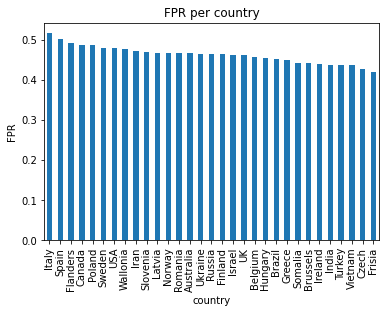

In [122]:
my_plot = dfprs.plot(kind='bar', legend=None, title="FPR per " + identifier)
my_plot.set_xlabel(identifier)
my_plot.set_ylabel("FPR")

In [124]:
dfnrs = pd.DataFrame(data={"identifier": identifiers, "FNR":fnrs})
dfnrs = dfnrs.groupby("identifier").sum().sort_values(by=["FNR"],ascending=False)

dfnrs.head()

,FNR
identifier,
Czech,0.03810
Somalia,0.03571
Latvia,0.03524
Greece,0.03476
Ireland,0.03381


Text(0, 0.5, 'FNR')

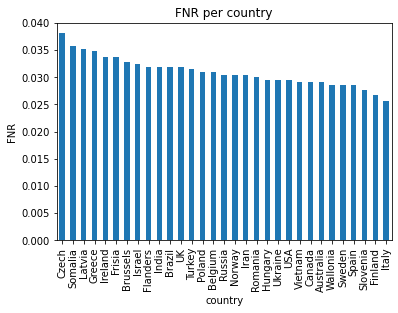

In [125]:
my_plot = dfnrs.plot(kind='bar', legend=None, title="FNR per " + identifier)
my_plot.set_xlabel(identifier)
my_plot.set_ylabel("FNR")

#### Calculate FNED and FPED

In [81]:
fped = 0
fned = 0

for _fpr, _fnr in zip(fprs, fnrs) :
    fped += abs(global_fpr - fpr)
    fned += abs(global_fnr - fnr)

print()
print("FPED: ", fped)
print("FNED: ", fned)


FPED:  0.46190476190476243
FNED:  0.07476190476190482
